# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



Hal yang paling pertama K-Means lakukan adalah memilih sebuah sampel secara acak untuk dijadikan centroid. Centroid adalah sebuah sampel pada data yang menjadi pusat dari sebuah klaster.
---
Kedua, hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance. 
---

Ketiga, hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
---

Keempat,assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 


---














---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [2]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [26]:
# Mengubah kateogrik menjadi numerik menggunakan teknik one-hot encoding
labelencoder = LabelEncoder()
df['Jenis Kelamin'] = labelencoder.fit_transform(df['Jenis Kelamin'])
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,0,19.0,15,39.0
1,2,0,21.0,15,81.0
2,3,1,20.0,16,6.0
3,4,1,23.0,16,77.0
4,5,1,31.0,17,40.0
...,...,...,...,...,...
245,246,0,59.0,93,14.0
246,247,0,35.0,93,90.0
247,248,1,37.0,97,32.0
248,249,1,32.0,97,86.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    int64  
 2   Umur                        250 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        250 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 9.9 KB


In [28]:
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










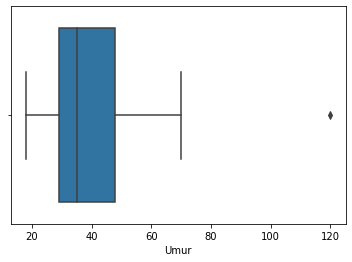

In [31]:
import seaborn as sns

sns.boxplot(x='Umur', data=df)

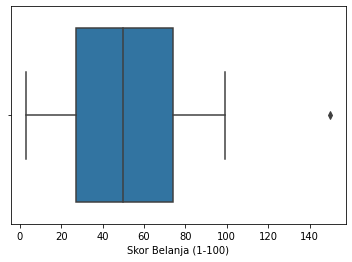

In [32]:
sns.boxplot(x='Skor Belanja (1-100)', data=df)

In [48]:
#code here
# Menghilangkan missing value
df = df.fillna(method='ffill')

# Menangani outlier dengan interquartile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
newdf=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers dan mengubah dataset hanya memiliki 2 kolom
newdf = newdf[['Umur', 'Skor Belanja (1-100)']]
newdf.shape

(246, 2)

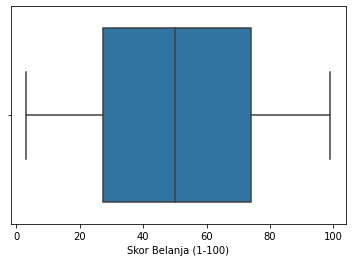

In [49]:
sns.boxplot(x='Skor Belanja (1-100)', data=newdf)

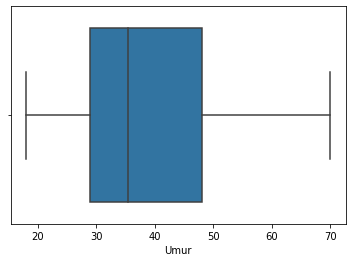

In [50]:
sns.boxplot(x='Umur', data=newdf)

In [53]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Standarisasi menggunakan StandardScaler
scaler = preprocessing.StandardScaler().fit(newdf)
newdf = scaler.transform(newdf)

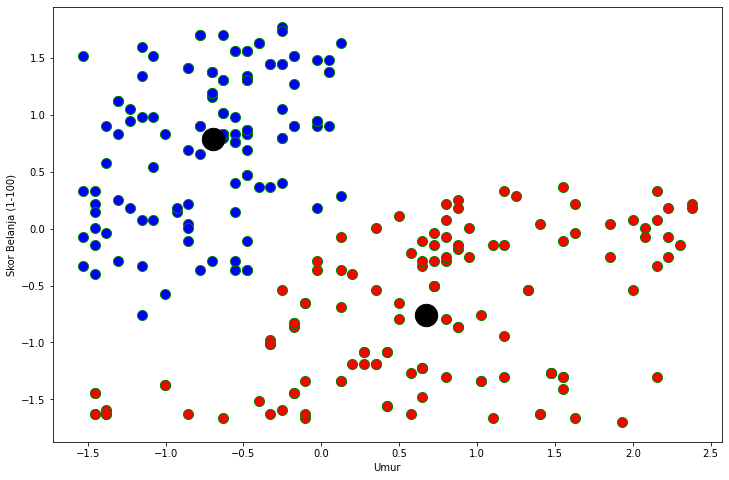

In [75]:
#Clustering dengan K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans1 = KMeans(n_clusters=2, random_state=42).fit(newdf)
labels1 = kmeans1.labels_

newdf_std = pd.DataFrame(data = newdf, columns = ['Umur', 'Skor Belanja(1=100)'])
newdf_std['label_kmeans1'] = labels1 

#Memvisualisasikan Hasil Clustering menggunakan scatterplot
plt.figure(figsize=(12,8))
plt.scatter(newdf_std.Umur[newdf_std.label_kmeans1 == 0], newdf_std['Skor Belanja(1=100)'][newdf_std.label_kmeans1 == 0], c='blue', s=100, edgecolor='green',linestyle='-')
plt.scatter(newdf_std.Umur[newdf_std.label_kmeans1 == 1], newdf_std['Skor Belanja(1=100)'][newdf_std.label_kmeans1 == 1], c='red', s=100, edgecolor='green',linestyle='-')
#plt.scatter(newdf_std.Umur[newdf_std.label_kmeans1 == 2], newdf_std['Skor Belanja(1=100)'][newdf_std.label_kmeans1 == 2], c='green', s=100, edgecolor='green',linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()



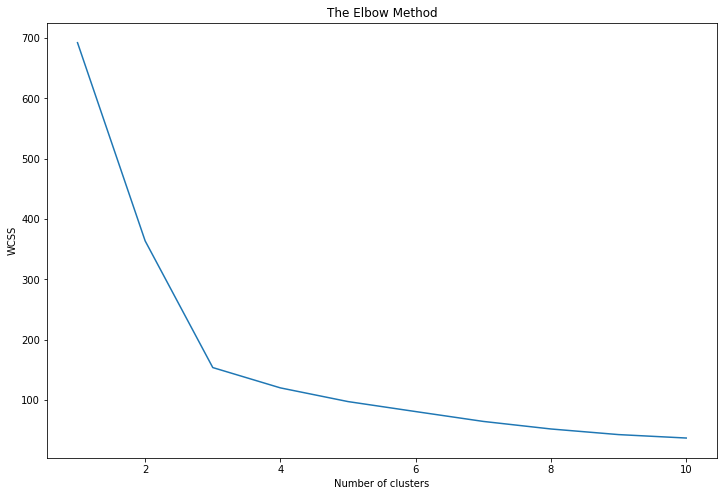

In [72]:
#Mencari n cluster yang ideal menggunakan Elbow Method

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init='k-means++', random_state = 42 )
  kmeans.fit(newdf_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize= (12, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
#inisiasi ulang cluster
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(newdf)

kmeans2.labels_

array([2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 2, 1], dtype=int32)

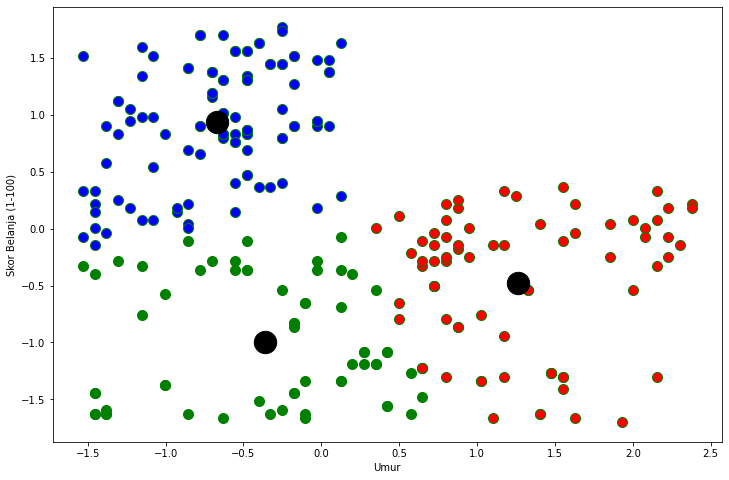

In [77]:
labels2 = kmeans2.labels_
newdf_std['label_kmeans2'] = labels2

#Memvisualisasikan hasil clustering
plt.figure(figsize=(12,8))
plt.scatter(newdf_std.Umur[newdf_std.label_kmeans2 == 0], newdf_std['Skor Belanja(1=100)'][newdf_std.label_kmeans2 == 0], c='red', s=100, edgecolor='green',linestyle='-')
plt.scatter(newdf_std.Umur[newdf_std.label_kmeans2 == 1], newdf_std['Skor Belanja(1=100)'][newdf_std.label_kmeans2 == 1], c='blue', s=100, edgecolor='green',linestyle='-')
plt.scatter(newdf_std.Umur[newdf_std.label_kmeans2 == 2], newdf_std['Skor Belanja(1=100)'][newdf_std.label_kmeans2 == 2], c='green', s=100, edgecolor='green',linestyle='-')
#plt.scatter(newdf_std.Umur[newdf_std.label_kmeans2 == 3], newdf_std['Skor Belanja(1=100)'][newdf_std.label_kmeans2 == 3], c='yellow', s=100, edgecolor='green',linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()


In [80]:
#Menghitung coeficient silhoutte clustering
from sklearn.metrics import silhouette_score

print(silhouette_score(newdf_std, labels=labels1))
print(silhouette_score(newdf_std, labels=labels2))

0.473567609826142
0.5969477519359848


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Pada cluster pertama yang berwarna hijau merupakan pelanggan yang umurnya remaja dan skor belanja tidak terlalu banyak.

Cluster kedua yang berwarna merah adalah pelanggan yang umurnya sudah dewasa atau bahkan tua tetapi skor belanjanya juga rendah.

Cluster ketiga yang berwarna biru merupakan pelanggan yang masih remaja dan memiliki skor belanja yang tinggi.